In [1]:
import numpy as np

from itkwidgets import view
import matplotlib.pyplot as plt

import site
site.addsitedir("../src")

from mocoreg import mocoreg

In [2]:
app = mocoreg(register_to_frame_zero=True)
#app.debug = True
app.read_4d_bmode_matlab_file('../Data/bmenvRyanNonPermuted_1.dat', nframes=200, nlateral=102, nelevation=102, ndepth=92)

max_keyframe_interval 33
keyframe_search_stepsize 5


In [3]:
app.compute_keyframes()

In [4]:
print(app.keyframes)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 75, 85, 95, 105, 115, 130, 145, 170, 199]


In [5]:
import time
start_time = time.perf_counter()
app.register_keyframes(app.keyframes)
end_time = time.perf_counter()

print("Time required for registration (seconds) = ", end_time-start_time)

Registering set 1 of 21: Frame = 5


itkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'itkImageF4'
vectoritkImageF4 not loaded from module TubeTK because of exception:
 module 'itk.TubeTKPython' has no attribute 'vectoritkImageF4'


Registering set 2 of 21: Frame = 10
Registering set 3 of 21: Frame = 15
Registering set 4 of 21: Frame = 20
Registering set 5 of 21: Frame = 25
Registering set 6 of 21: Frame = 30
Registering set 7 of 21: Frame = 35
Registering set 8 of 21: Frame = 40
Registering set 9 of 21: Frame = 45
Registering set 10 of 21: Frame = 50
Registering set 11 of 21: Frame = 55
Registering set 12 of 21: Frame = 65
Registering set 13 of 21: Frame = 75
Registering set 14 of 21: Frame = 85
Registering set 15 of 21: Frame = 95
Registering set 16 of 21: Frame = 105
Registering set 17 of 21: Frame = 115
Registering set 18 of 21: Frame = 130
Registering set 19 of 21: Frame = 145
Registering set 20 of 21: Frame = 170
Registering set 21 of 21: Frame = 199
Done!
Time required for registration (seconds) =  226.42190269999998


In [6]:
app.interpolate_keyframe_transforms(window=3)

In [7]:
app.apply_transforms()

In [8]:
tmp = [ list(app.transforms[x].GetParameters()) for x in range(len(app.transforms))]
print(len(tmp), len(app.data_array))
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])

199 200


In [9]:
from matplotlib import pyplot as plt

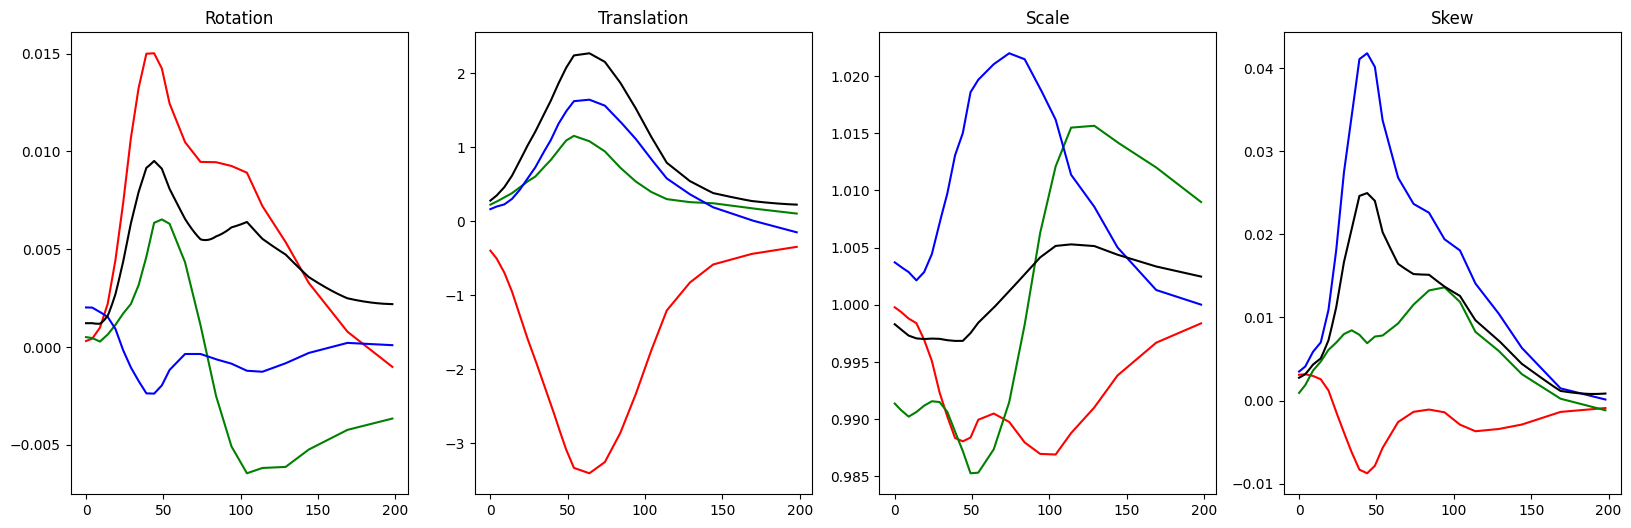

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
rlim = plt.gca().get_ylim()
plt.title("Rotation")
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
tlim = plt.gca().get_ylim()
plt.title("Translation")
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
slim = plt.gca().get_ylim()
plt.title("Scale")
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
klim = plt.gca().get_ylim()
plt.title("Skew");

In [11]:
meansq, diffs = app.compute_inter_keyframe_diffs()
meansq_reg, diffs_reg = app.compute_inter_keyframe_diffs(data_array=app.data_array_reg)

In [12]:
print(diffs, meansq)
print("")
print(diffs_reg, meansq_reg)

[37764.01652854487, 52354.95911277654, 59473.60055926443, 73722.75574413603, 88762.77062286655, 104149.63802678093, 115717.53676256536, 123470.97319108735, 130964.96081261324, 137755.5920566992, 142788.277512822, 147624.50714354412, 146349.53241078815, 145882.8021710833, 138121.7725595371, 122372.825809421, 103557.17434394754, 88557.49326112207, 74116.10320950681, 71517.00594326889, 62068.81513276331] 108800.92762505265

[42239.04430870329, 47595.86028805102, 52790.493940276574, 55289.25582025251, 56720.987588508855, 57936.680848982694, 62199.11196671821, 65535.76298327118, 67265.43527129054, 68924.82168084432, 70137.88661767123, 72674.9172139026, 74761.21393758168, 82059.66295029773, 82160.84892819084, 77258.20675028968, 71271.22715029278, 66646.2895814351, 56570.38332861461, 57818.852532058445, 55691.21428408335] 64849.78637052513


In [13]:
print( np.sum(np.abs(app.data_array[0] - app.data_array[10])))
print( np.sum(np.abs(app.data_array_reg[0] - app.data_array_reg[10])))

26360638546.137257
23541147803.762276


In [14]:
app2 = mocoreg(register_to_frame_zero=True)
app2.data_array = app.data_array_reg
app2.compute_keyframes()
print("Using new frames =", app2.keyframes)
start_time2 = time.perf_counter()
app2.register_keyframes()  # app.keyframes)
end_time2 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time2-start_time2)

max_keyframe_interval 33
keyframe_search_stepsize 5
Using new frames = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 55, 65, 75, 85, 95, 105, 115, 130, 145, 165, 197, 199]
Registering set 1 of 21: Frame = 5
Registering set 2 of 21: Frame = 10
Registering set 3 of 21: Frame = 15
Registering set 4 of 21: Frame = 20
Registering set 5 of 21: Frame = 25
Registering set 6 of 21: Frame = 30
Registering set 7 of 21: Frame = 35
Registering set 8 of 21: Frame = 40
Registering set 9 of 21: Frame = 45
Registering set 10 of 21: Frame = 55
Registering set 11 of 21: Frame = 65
Registering set 12 of 21: Frame = 75
Registering set 13 of 21: Frame = 85
Registering set 14 of 21: Frame = 95
Registering set 15 of 21: Frame = 105
Registering set 16 of 21: Frame = 115
Registering set 17 of 21: Frame = 130
Registering set 18 of 21: Frame = 145
Registering set 19 of 21: Frame = 165
Registering set 20 of 21: Frame = 197
Registering set 21 of 21: Frame = 199
Done!
Time required for registration (seconds) =  123.5460025

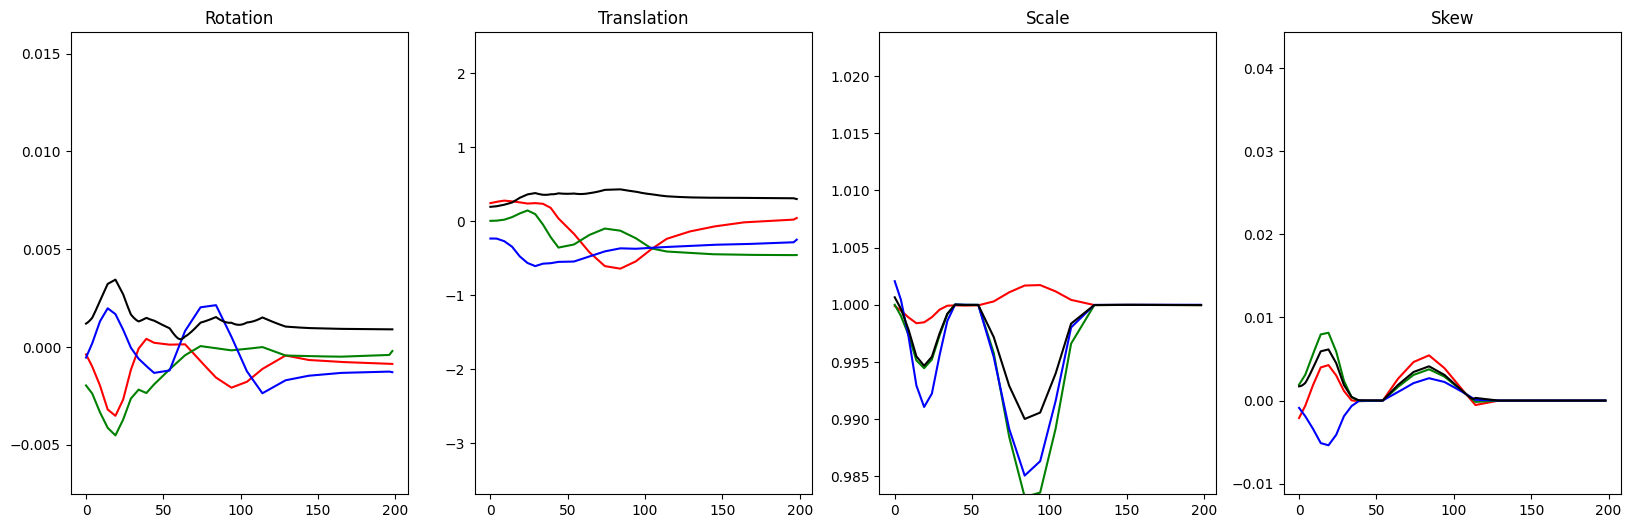

In [15]:
app2.interpolate_keyframe_transforms(window=2)
app2.apply_transforms()
tmp = [ list(app2.transforms[x].GetParameters()) for x in range(len(app2.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);

In [18]:
import itk

yOrg = app.data_array[:,:,50,:].astype(np.float32)
yReg = app.data_array_reg[:,:,50,:].astype(np.float32)
yRegReg = app2.data_array_reg[:,:,50,:].astype(np.float32)
itk.imwrite(itk.GetImageFromArray(yOrg), "org.mha")
itk.imwrite(itk.GetImageFromArray(yReg), "reg.mha")
itk.imwrite(itk.GetImageFromArray(yRegReg), "regreg.mha")

In [19]:
app3 = mocoreg(register_to_frame_zero=True)
app3.data_array = app2.data_array_reg
app3.compute_keyframes()
print("Using new frames =", app3.keyframes)
start_time3 = time.perf_counter()
app3.register_keyframes()  # app.keyframes)
end_time3 = time.perf_counter()
print("Time required for registration (seconds) = ", end_time3-start_time3)

max_keyframe_interval 33
keyframe_search_stepsize 5
Using new frames = [0, 32, 37, 42, 47, 57, 67, 77, 87, 97, 107, 122, 137, 157, 189, 199]
Registering set 1 of 15: Frame = 32
Registering set 2 of 15: Frame = 37
Registering set 3 of 15: Frame = 42
Registering set 4 of 15: Frame = 47
Registering set 5 of 15: Frame = 57
Registering set 6 of 15: Frame = 67
Registering set 7 of 15: Frame = 77
Registering set 8 of 15: Frame = 87
Registering set 9 of 15: Frame = 97
Registering set 10 of 15: Frame = 107
Registering set 11 of 15: Frame = 122
Registering set 12 of 15: Frame = 137
Registering set 13 of 15: Frame = 157
Registering set 14 of 15: Frame = 189
Registering set 15 of 15: Frame = 199
Done!
Time required for registration (seconds) =  77.9812493999998


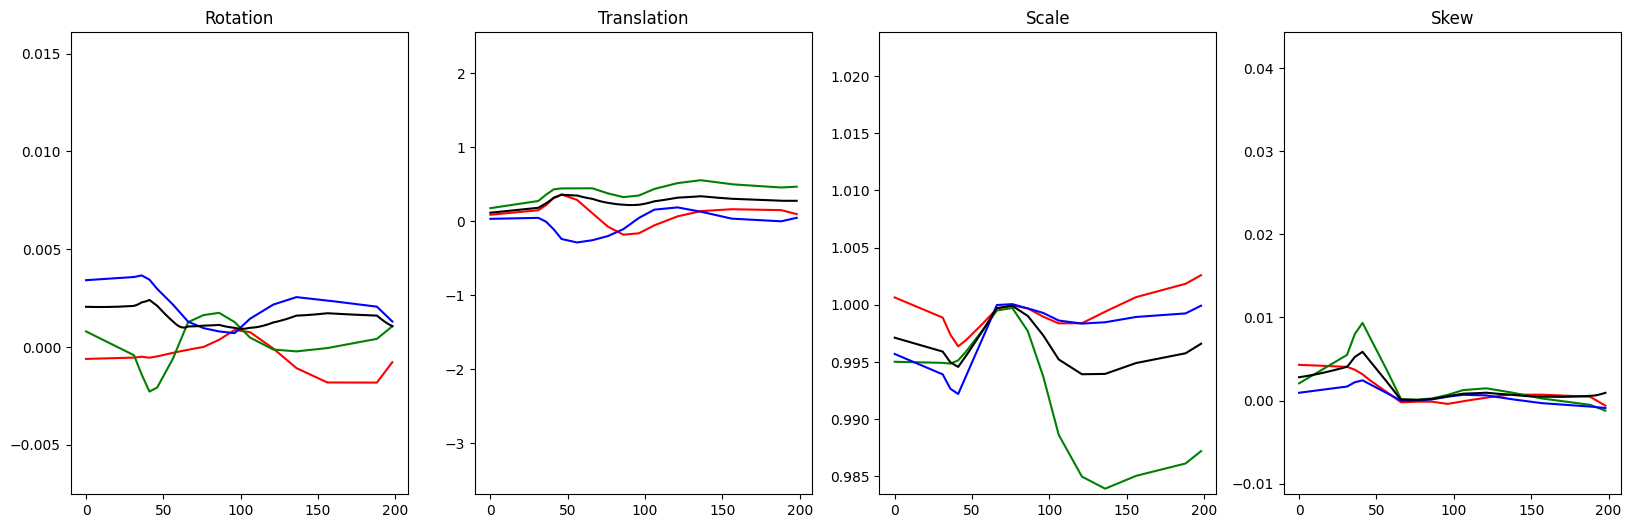

In [20]:
app3.interpolate_keyframe_transforms(window=2)
app3.apply_transforms()
tmp = [ list(app3.transforms[x].GetParameters()) for x in range(len(app3.transforms))]
rx = np.array([v[0] for v in tmp])
ry = np.array([v[1] for v in tmp])
rz = np.array([v[2] for v in tmp])
x = np.array([v[3] for v in tmp])
y = np.array([v[4] for v in tmp])
z = np.array([v[5] for v in tmp])
sx = np.array([v[6] for v in tmp])
sy = np.array([v[7] for v in tmp])
sz = np.array([v[8] for v in tmp])
kx = np.array([v[9] for v in tmp])
ky = np.array([v[10] for v in tmp])
kz = np.array([v[11] for v in tmp])
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.plot(rx,'r'),plt.plot(ry,'g'),plt.plot(rz,'b'),plt.plot(np.sqrt((rx*rx+ry*ry+rz*rz)/3),'k')
plt.title("Rotation")
plt.gca().set_ylim(rlim)
plt.subplot(1,4,2)
plt.plot(x,'r'),plt.plot(y,'g'),plt.plot(z,'b'),plt.plot(np.sqrt((x*x+y*y+z*z)/3),'k')
plt.title("Translation")
plt.gca().set_ylim(tlim)
plt.subplot(1,4,3)
plt.plot(sx,'r'),plt.plot(sy,'g'),plt.plot(sz,'b'),plt.plot(np.sqrt((sx*sx+sy*sy+sz*sz)/3),'k')
plt.title("Scale")
plt.gca().set_ylim(slim)
plt.subplot(1,4,4)
plt.plot(kx,'r'),plt.plot(ky,'g'),plt.plot(kz,'b'),plt.plot(np.sqrt((kx*kx+ky*ky+kz*kz)/3),'k')
plt.title("Skew")
plt.gca().set_ylim(klim);